### Dataset overview

-   reviewer_name: The name or identifier of the individual who provided the review
-   rate: The numerical rating given by the reviewer
-   date: The date on which the review was submitted
-   text: The textual content of the review, expressing the reviewer's opinions and experiences
-   Name: The name of the entity being reviewed (e.g., hotel, restaurant)
-   Location: The geographical location of the reviewed entity
-   category: The category or industry to which the reviewed entity belongs
-   source: The platform or website from which the review was collected


In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [313]:
df = pd.read_csv("Text_data.csv",encoding="utf-8")

In [314]:
df.head()

,reviewer_name,rate,date,text,Name,Location,category,source
0,Varun,8.0,2024-07-27 00:00:00,NaN,فندق كارم الرياض Karim Hotel Riyadh,"Prince Mugrin Ibn Abdulaziz, An Nuzhah Distric...",hotel,booking
1,Roof,10.0,2024-07-26 00:00:00,NaN,فندق كارم الرياض Karim Hotel Riyadh,"Prince Mugrin Ibn Abdulaziz, An Nuzhah Distric...",hotel,booking
2,Dalal,10.0,2024-07-17 00:00:00,NaN,فندق كارم الرياض Karim Hotel Riyadh,"Prince Mugrin Ibn Abdulaziz, An Nuzhah Distric...",hotel,booking
3,Mushary,10.0,2024-07-16 00:00:00,NaN,فندق كارم الرياض Karim Hotel Riyadh,"Prince Mugrin Ibn Abdulaziz, An Nuzhah Distric...",hotel,booking
4,مقرن,8.0,2024-07-14 00:00:00,موقع الفندق جداً ممتاز والغرف نظيفة ولا يوجد ا...,فندق كارم الرياض Karim Hotel Riyadh,"Prince Mugrin Ibn Abdulaziz, An Nuzhah Distric...",hotel,booking


In [263]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import arabic_reshaper
import string
import warnings

In [264]:
# Load Arabic stopwords from the NLTK library
arabic_stopwords = stopwords.words('arabic')

# Create a list of punctuation marks to be removed from the text
punctuations = [punc for punc in string.punctuation]

# Suppress any warnings to keep the output clean
warnings.filterwarnings('ignore')

# Set the style for matplotlib plots to 'seaborn' for better aesthetics
plt.style.use('seaborn-v0_8')

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28930 entries, 0 to 28929
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviewer_name  28866 non-null  object
 1   rate           26029 non-null  object
 2   date           28930 non-null  object
 3   text           21714 non-null  object
 4   Name           28930 non-null  object
 5   Location       15721 non-null  object
 6   category       28930 non-null  object
 7   source         28930 non-null  object
dtypes: object(8)
memory usage: 1.8+ MB


In [266]:
df.isnull().sum()

reviewer_name       64
rate              2901
date                 0
text              7216
Name                 0
Location         13209
category             0
source               0
dtype: int64

In [267]:
df.duplicated().sum()

115

In [268]:
# drop null values in review text column 
df.dropna(subset=["text"],inplace=True)

In [269]:
# fill missing locations with unkown value 
df["Location"].fillna("unkown",inplace=True)

In [270]:
df.dropna(subset=['rate'],inplace=True)
# df.fillna(df["rate"].mean(),inplace=True)

In [271]:
# fill missing reviewers with unkown value 
df["reviewer_name"].fillna("unkown",inplace=True)

In [272]:
# drop duplicates 
df.drop_duplicates(inplace=True)

In [273]:
df.isnull().sum()


reviewer_name    0
rate             0
date             0
text             0
Name             0
Location         0
category         0
source           0
dtype: int64

In [274]:
df.reset_index()

,index,reviewer_name,rate,date,text,Name,Location,category,source
0,4,مقرن,8.0,2024-07-14 00:00:00,موقع الفندق جداً ممتاز والغرف نظيفة ولا يوجد ا...,فندق كارم الرياض Karim Hotel Riyadh,"Prince Mugrin Ibn Abdulaziz, An Nuzhah Distric...",hotel,booking
1,8,Arie,7.0,2024-07-09 00:00:00,"Breakfast was good , bed was good , service wa...",فندق كارم الرياض Karim Hotel Riyadh,"Prince Mugrin Ibn Abdulaziz, An Nuzhah Distric...",hotel,booking
2,12,Baljit,10.0,2024-07-28 00:00:00,Breakfast at 56 was awesome \nLot of varieties...,Hyatt Regency Riyadh Olaya,"Olaya Road, Al Olaya, 11433 Riyadh, Saudi Arabia",hotel,booking
3,13,Noor,10.0,2024-07-28 00:00:00,الموقع والهدوء والنظافة\nتعامل الموظفين وسهولة...,Hyatt Regency Riyadh Olaya,"Olaya Road, Al Olaya, 11433 Riyadh, Saudi Arabia",hotel,booking
4,15,Talal,10.0,2024-07-27 00:00:00,كل شي كان جميل ويستحق الاشاده || لايوجد شي,Hyatt Regency Riyadh Olaya,"Olaya Road, Al Olaya, 11433 Riyadh, Saudi Arabia",hotel,booking
...,...,...,...,...,...,...,...,...,...
18767,26022,أبويونس الجعيدي,4 stars,2024/03/06 13:51:10,ممتاز,Security Forces Hospital,unkown,hospital,google
18768,26024,نواف,5 stars,2024/03/06 13:51:12,كانت ارجع فيه من ٢٠٠١ إلى ٢٠١٢ ممتاز قمه في ال...,Security Forces Hospital,unkown,hospital,google
18769,26025,Abo Naser,1 star,2024/03/06 13:51:14,اتمنى من المشرف العام على المستشفى والمسؤولين ...,Security Forces Hospital,unkown,hospital,google
18770,26026,Mano Asiri,1 star,2024/03/06 13:51:16,لايوجد مواعيد حسبي الله,Security Forces Hospital,unkown,hospital,google


In [275]:
df["Name"].value_counts()

Name
Crowne Plaza Riyadh Palace                      79
Magnesium International Cafe - Riyadh           75
Shawarmer Restaurant - Riyadh                   71
Steak House - American Restaurant - Riyadh      70
Braira Al Nakheel Hotel                         66
                                                ..
اجنحه وارف                                       1
Ayan Furnished Units and Suites                  1
Sadan Furnished Apartments                       1
Al Asemah Hotel                                  1
شقة انيقة ستديو في حي السليمانية( دخول ذاتي)     1
Name: count, Length: 1506, dtype: int64

In [276]:
df["category"].unique()

array(['hotel', 'restaurant', 'hospital'], dtype=object)

In [277]:
df["category"].value_counts()

category
hotel         8860
restaurant    8812
hospital      1100
Name: count, dtype: int64

In [278]:
df["source"].unique()

array(['booking', 'welcomesaudi', 'google'], dtype=object)

In [279]:
df["source"].value_counts()

source
welcomesaudi    13086
google           3570
booking          2116
Name: count, dtype: int64

## EDA 

In [280]:
# count number of reviews for each category
categories_reviews_count = df['category'].value_counts().sort_values(ascending=False)

fig=px.bar(categories_reviews_count)
fig.update_layout(title='Count of Reviews for each Company')
fig.show()


In [281]:
# Convert 'rate' column to numeric, forcing errors to NaN
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')


In [282]:
# Calculate the average rating for each company by grouping the data by 'company' and taking the mean of 'rating'
# The resulting DataFrame is sorted in ascending order based on the average rating
categories_average_ratings = df.groupby('category')['rate'].mean().sort_values()

# Convert the Series to a DataFrame for easier manipulation
categories_average_ratings = pd.DataFrame(categories_average_ratings)

# Create a new column 'Color' based on the average rating:
# - Assign 'positive' if the rating is greater than or equal to 0
# - Assign 'negative' if the rating is less than 0
categories_average_ratings['Color'] = categories_average_ratings['rate'].apply(lambda x: 'positive' if x >= 3 else 'negative')

# Define a color map to specify colors for positive and negative ratings
color_map = {
    'positive': 'green',
    'negative': 'red'
}

# Create a bar chart using Plotly Express:
# - 'x' axis represents company names (index)
# - 'y' axis represents the average rating
# - Colors are assigned based on the 'Color' column using the defined color map
fig = px.bar(categories_average_ratings, x=categories_average_ratings.index, 
             y='rate', color='Color', color_discrete_map=color_map)

# Update the layout of the plot, setting the title for better context
fig.update_layout(title='Mean of Ratings for each Company')

# Display the plot
fig.show()


#### this graph explained that the average rating are bigger than 4

In [283]:
# but you can choose others from plotly.colors if you prefer different aesthetics.
colors = px.colors.qualitative.Plotly

# Create a dictionary to map each company to a unique color from the chosen color sequence.
# The color selection uses modulo operation to cycle through the color list if the number of companies exceeds the color list length.
color_map = {category: colors[i % len(colors)] for i, category in enumerate(df['category'].unique())}

# Loop through each unique company in the dataset
for category in df['category'].unique():
    # Filter the dataframe to get only the rows corresponding to the current company
    temp_df = df[df['category'] == category]
    
    # Calculate the count of each rating value and sort the counts in ascending order
    ratings_count = temp_df['rate'].value_counts().sort_values()

    # Create a bar plot for the current company's rating counts, using the unique color assigned in the color_map
    fig = px.bar(ratings_count, color_discrete_sequence=[color_map[category]])
    
      # Update the layout of the plot with a title indicating which company's ratings are being displayed
    fig.update_layout(title=f'Count of Ratings for {category}')

    # Display the plot
    fig.show()

In [284]:
df_cat_gro= df.groupby('category')["rate"].mean()
df_cat_gro

category
hospital           NaN
hotel         4.854849
restaurant    4.279043
Name: rate, dtype: float64

<Axes: xlabel='category', ylabel='rate'>

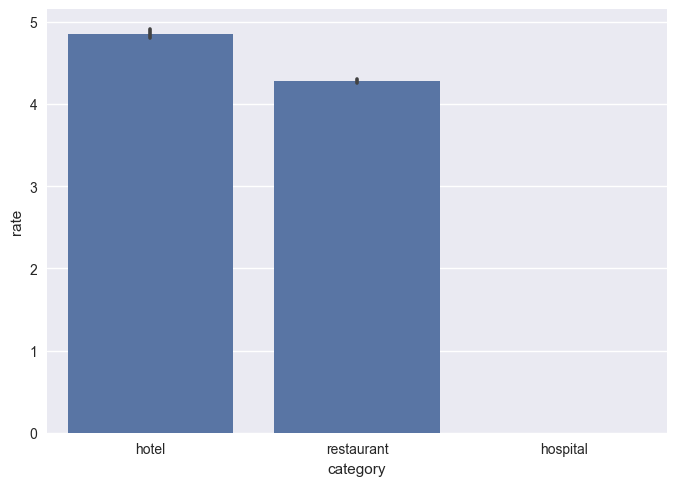

In [285]:
sns.barplot(data=df,x=df["category"],y=df["rate"],)

<Axes: xlabel='rate', ylabel='Density'>

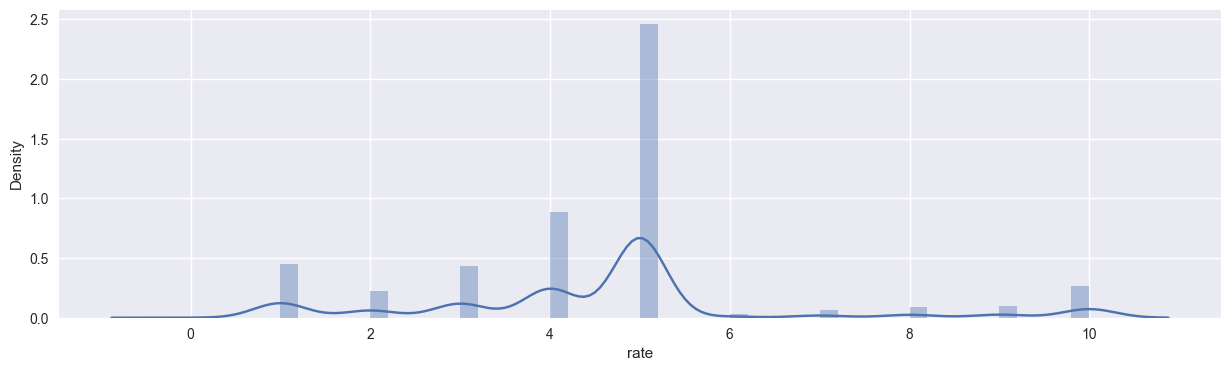

In [286]:
plt.rcParams['figure.figsize'] = (15, 4)


sns.distplot(df['rate'])


### Extracing Features 

In [287]:
# column to count charecters in every review
df["char_count"]=df["text"].astype(str).apply(len)

In [288]:
# column to count words in every review 
df["word_count"]=df["text"].astype(str).apply(lambda x: len(x.split()))


In [289]:
# column for review density 
df["density"]=df["char_count"]/(df["word_count"]+1)

In [290]:
import string
punctuation =string.punctuation

In [297]:
from textblob import TextBlob


In [291]:
# code will get every punctuation in every review
df["punctuation_count"]=df["text"].astype(str).apply(lambda x:len("".join(_ for _ in x if _ in punctuation)))

In [292]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))
df["text"] = df["text"].astype(str).apply(remove_punctuation)


In [293]:
# lets make a function to remove Numbers from the reviews
import re
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i): # searh of numbers in string \d
            list_text_new.append(i)
    return ''.join(list_text_new)

df['text'] = df['text'].apply(drop_numbers)

In [294]:
# lets create a function to remove accented characters
import unicodedata # Import the unicodedata module        é

def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text

# lets apply the function
df['text'] = df.apply(lambda x: remove_accented_chars(x['text']), axis = 1)

In [295]:
#Removal of special characters
def remove_special_characters(text):
    pat=r'[^a-zA-z0-9]'
    return re.sub(pat, ' ',text)

df["text"]=df.apply(lambda x: remove_special_characters(x['text']), axis=1)

In [301]:
#Removal of special characters
def remove_special_characters(text):
    pat=r'[^a-zA-z0-9]'
    return re.sub(pat, ' ',text)

df["text"]=df.apply(lambda x: remove_special_characters(x['text']), axis=1)

In [296]:
df.head()

,reviewer_name,rate,date,text,Name,Location,category,source,char_count,word_count,density,punctuation_count
4,مقرن,8.0,2024-07-14 00:00:00,,فندق كارم الرياض Karim Hotel Riyadh,"Prince Mugrin Ibn Abdulaziz, An Nuzhah Distric...",hotel,booking,169,32,5.121212,2
8,Arie,7.0,2024-07-09 00:00:00,Breakfast was good bed was good service was ...,فندق كارم الرياض Karim Hotel Riyadh,"Prince Mugrin Ibn Abdulaziz, An Nuzhah Distric...",hotel,booking,127,26,4.703704,6
12,Baljit,10.0,2024-07-28 00:00:00,Breakfast at was awesome Lot of varieties to...,Hyatt Regency Riyadh Olaya,"Olaya Road, Al Olaya, 11433 Riyadh, Saudi Arabia",hotel,booking,73,15,4.562500,2
13,Noor,10.0,2024-07-28 00:00:00,,Hyatt Regency Riyadh Olaya,"Olaya Road, Al Olaya, 11433 Riyadh, Saudi Arabia",hotel,booking,129,20,6.142857,2
15,Talal,10.0,2024-07-27 00:00:00,,Hyatt Regency Riyadh Olaya,"Olaya Road, Al Olaya, 11433 Riyadh, Saudi Arabia",hotel,booking,42,9,4.200000,2


### Initialize Sentiment Analysis Models

#### Detect Language

In [298]:
from langdetect import detect

def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'


In [306]:
def apply_sentiment_analysis(text):
    if not isinstance(text, str) or not text.strip():
        return None
    
    language = detect_language(text)
    
    if language == 'ar':
        output = arabic_model(text)
    elif language == 'en':
        output = english_model(text)
    else:
        return None
    
    return output[0]['label']


In [307]:
# cleaning the texts
# importing the libraries for Natural Language Processing

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Capiter\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [311]:
def apply_sentiment_analysis(text):
    if not isinstance(text, str) or not text.strip():
        return None
    
    # Detect language
    language = detect_language(text)  # Ensure you have implemented language detection

    if language == 'ar':
        # Arabic text
        inputs = arabic_tokenizer(text, truncation=True, padding='max_length', max_length=512, return_tensors="pt")
        output = arabic_model(inputs['input_ids'])
    elif language == 'en':
        # English text
        output = english_model(text)
    else:
        return None
    
    return output[0]['label']
# df["sent"]=df["text"].astype(str).apply(apply_sentiment_analysis)

In [303]:
df.head()

,reviewer_name,rate,date,text,Name,Location,category,source,char_count,word_count,density,punctuation_count
4,مقرن,8.0,2024-07-14 00:00:00,,فندق كارم الرياض Karim Hotel Riyadh,"Prince Mugrin Ibn Abdulaziz, An Nuzhah Distric...",hotel,booking,169,32,5.121212,2
8,Arie,7.0,2024-07-09 00:00:00,Breakfast was good bed was good service was ...,فندق كارم الرياض Karim Hotel Riyadh,"Prince Mugrin Ibn Abdulaziz, An Nuzhah Distric...",hotel,booking,127,26,4.703704,6
12,Baljit,10.0,2024-07-28 00:00:00,Breakfast at was awesome Lot of varieties to...,Hyatt Regency Riyadh Olaya,"Olaya Road, Al Olaya, 11433 Riyadh, Saudi Arabia",hotel,booking,73,15,4.562500,2
13,Noor,10.0,2024-07-28 00:00:00,,Hyatt Regency Riyadh Olaya,"Olaya Road, Al Olaya, 11433 Riyadh, Saudi Arabia",hotel,booking,129,20,6.142857,2
15,Talal,10.0,2024-07-27 00:00:00,,Hyatt Regency Riyadh Olaya,"Olaya Road, Al Olaya, 11433 Riyadh, Saudi Arabia",hotel,booking,42,9,4.200000,2
